<a href="https://colab.research.google.com/github/armitaghobadi/Machine-Learning-and-Predictive-Modeling/blob/main/Gesture_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# List all files and directories in the current directory
os.listdir('.')

['.config', 'sample_data']

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Gesture.xlsx'


In [7]:
#importing libraries for data manipulation
import pandas as pd
import numpy as np

#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for building linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import libraries for scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

file_path = '/content/drive/MyDrive/Gesture.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


,SID,PROFICIENCY,SEX,CONTEXT,AMOUNT,DIVERSITY,COMPLEXITY/SIMPLE,COMPLEXITY/COMPLEX
0,MN_2447,1,1,1,36,20,10,5
1,MN_2447,1,1,2,18,13,3,0
2,MN_5998,1,1,1,33,21,16,17
3,MN_5998,1,1,2,12,10,10,2
4,MN_1326,1,1,1,59,21,3,2


In [8]:
#seeing percentage of missing variables
df.isnull().mean()*100

,0
SID,0.0
PROFICIENCY,0.0
SEX,0.0
CONTEXT,0.0
AMOUNT,0.0
DIVERSITY,0.0
COMPLEXITY/SIMPLE,0.0
COMPLEXITY/COMPLEX,0.0


In [ ]:
#analyzing/visualizing data one at a time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SID                 132 non-null    object
 1   PROFICIENCY         132 non-null    int64 
 2   SEX                 132 non-null    int64 
 3   CONTEXT             132 non-null    int64 
 4   AMOUNT              132 non-null    int64 
 5   DIVERSITY           132 non-null    int64 
 6   COMPLEXITY/SIMPLE   132 non-null    int64 
 7   COMPLEXITY/COMPLEX  132 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.4+ KB


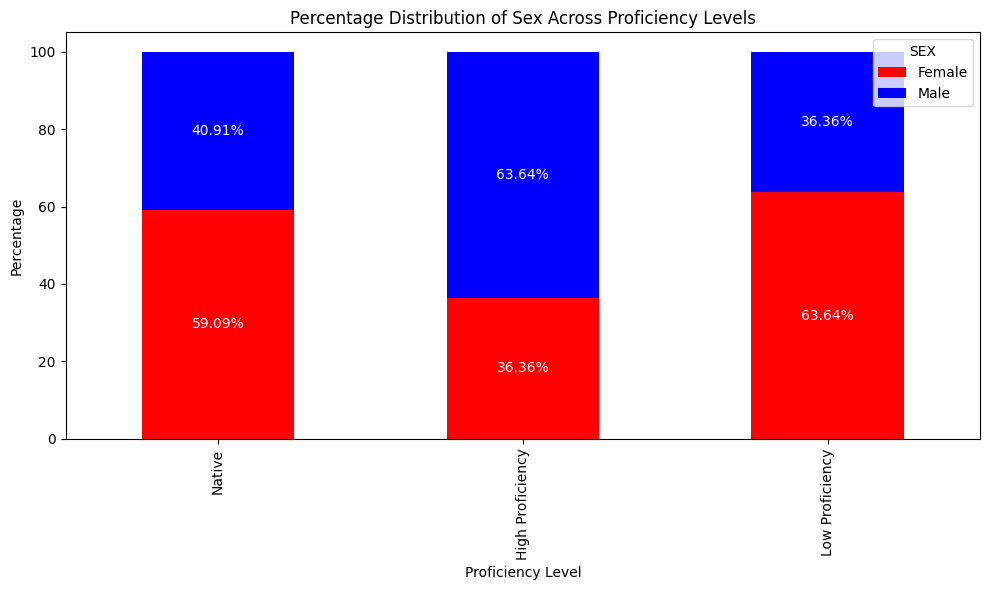

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a mapping dictionary for the categorical variables
proficiency_mapping = {1: 'Native', 2: 'High Proficiency', 3: 'Low Proficiency'}
sex_mapping = {1: 'Female', 2: 'Male'}

# Replace the numerical values with descriptive labels
df['PROFICIENCY'] = df['PROFICIENCY'].map(proficiency_mapping)
df['SEX'] = df['SEX'].map(sex_mapping)

# Calculate the percentage distribution of sex within each proficiency level
proficiency_sex_counts = df.groupby(['PROFICIENCY', 'SEX']).size().unstack(fill_value=0)
proficiency_sex_percentage = proficiency_sex_counts.div(proficiency_sex_counts.sum(axis=1), axis=0) * 100

# Reorder proficiency levels
proficiency_order = ['Native', 'High Proficiency', 'Low Proficiency']
proficiency_sex_percentage = proficiency_sex_percentage.loc[proficiency_order]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Use custom colors for Female and Male
colors = {'Female': 'red', 'Male': 'blue'}
proficiency_sex_percentage.plot(kind='bar', stacked=True, ax=ax, color=[colors[col] for col in proficiency_sex_percentage.columns])

# Set the labels and title
ax.set_xlabel('Proficiency Level')
ax.set_ylabel('Percentage')
ax.set_title('Percentage Distribution of Sex Across Proficiency Levels')

# Add percentage labels on the bars
for i, (index, row) in enumerate(proficiency_sex_percentage.iterrows()):
    cumulative_percentage = 0
    for sex, percentage in row.items():
        ax.text(i, cumulative_percentage + percentage / 2, f'{percentage:.2f}%',
                ha='center', va='center', color='white')
        cumulative_percentage += percentage

# Ensure that the x-axis has the correct order of proficiency levels
ax.set_xticklabels(proficiency_order)

plt.tight_layout()
plt.show()


In [ ]:
#see numerical variables
df.describe()

,CONTEXT,AMOUNT,DIVERSITY,COMPLEXITY/SIMPLE,COMPLEXITY/COMPLEX
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,1.484848,56.333333,23.712121,17.931818,4.310606
std,0.501674,41.755315,14.990343,16.211481,4.417406
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,30.000000,14.000000,5.000000,1.000000
50%,1.000000,48.500000,22.000000,14.500000,3.000000
75%,2.000000,74.000000,31.500000,25.250000,7.000000
max,2.000000,205.000000,80.000000,81.000000,30.000000


In [10]:
#see variables's name:
df.columns

Index(['SID', 'PROFICIENCY', 'SEX', 'CONTEXT', 'AMOUNT', 'DIVERSITY',
       'COMPLEXITY/SIMPLE', 'COMPLEXITY/COMPLEX'],
      dtype='object')

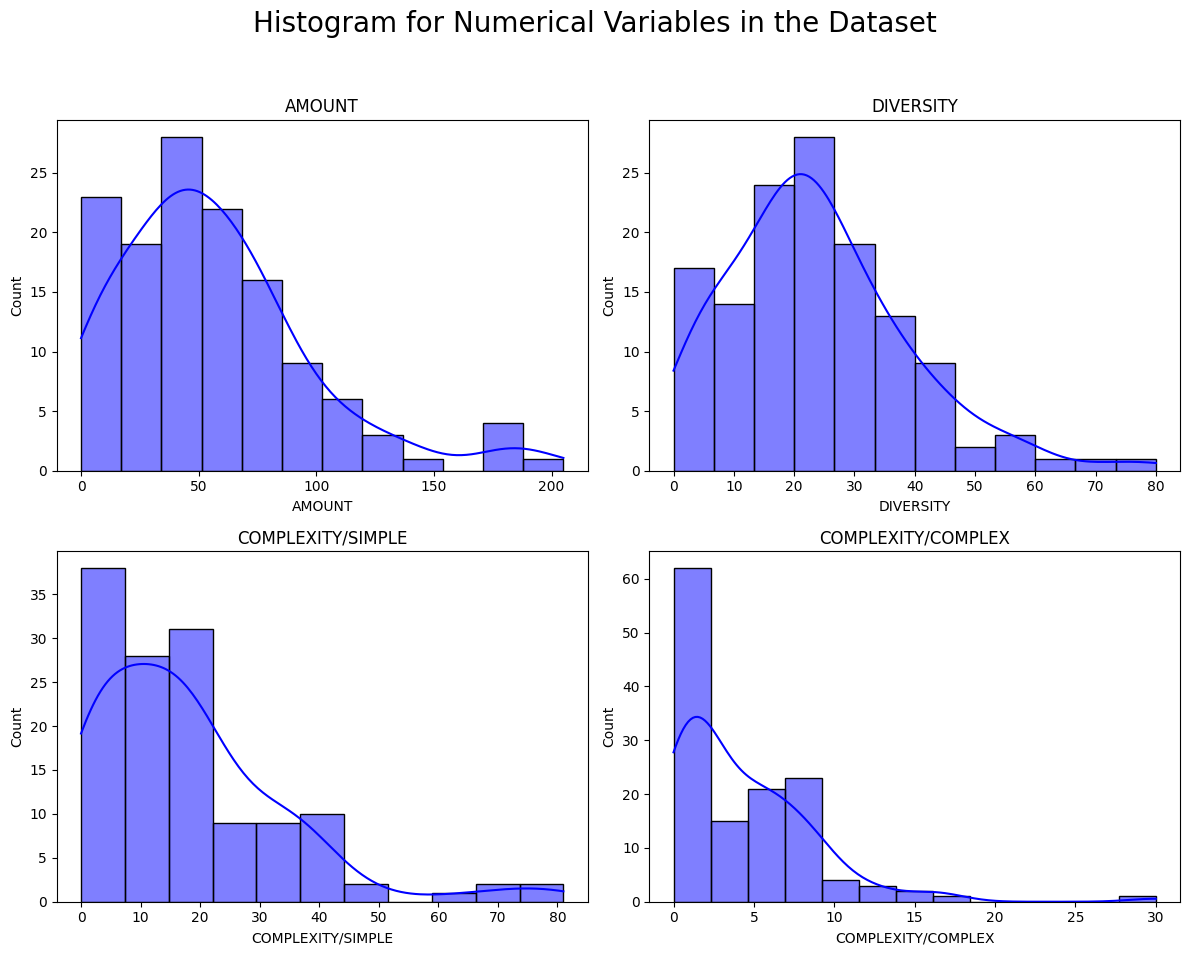

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing numerical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted to 2x2 grid for 4 histograms
fig.suptitle('Histogram for Numerical Variables in the Dataset', fontsize=20)

# Histogram for AMOUNT
sns.histplot(df['AMOUNT'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('AMOUNT')

# Histogram for DIVERSITY
sns.histplot(df['DIVERSITY'], kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('DIVERSITY')

# Histogram for COMPLEXITY/SIMPLE
sns.histplot(df['COMPLEXITY/SIMPLE'], kde=True, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('COMPLEXITY/SIMPLE')

# Histogram for COMPLEXITY/COMPLEX
sns.histplot(df['COMPLEXITY/COMPLEX'], kde=True, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('COMPLEXITY/COMPLEX')

# Adjust layout to fit the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Same as speech, here also the data is positively skewed. It shows: 1- mean is the greatest value also the sample is homogenous.

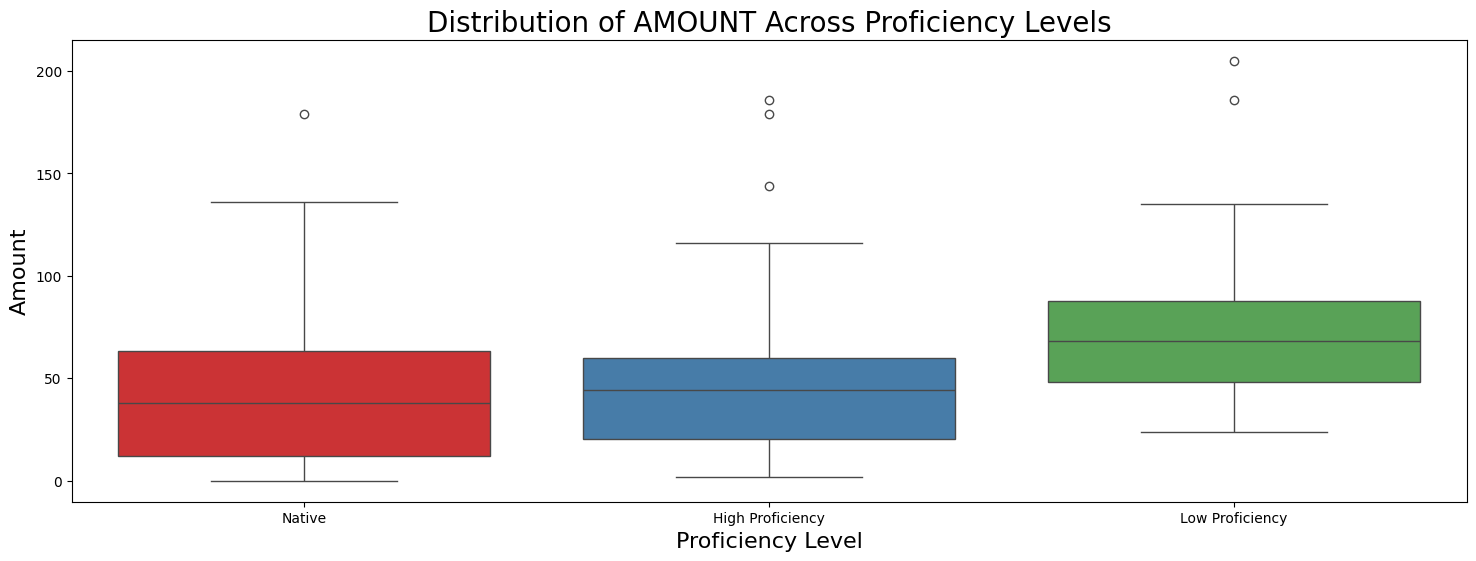

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig = plt.figure(figsize=(18, 6))

# Create a box plot to visualize the distribution of AMOUNT across different PROFICIENCY levels
sns.boxplot(x='PROFICIENCY', y='AMOUNT', data=df, palette='Set1')

# Set the title and labels
plt.title('Distribution of AMOUNT Across Proficiency Levels', fontsize=20)
plt.xlabel('Proficiency Level', fontsize=16)
plt.ylabel('Amount', fontsize=16)

# Show the plot
plt.show()


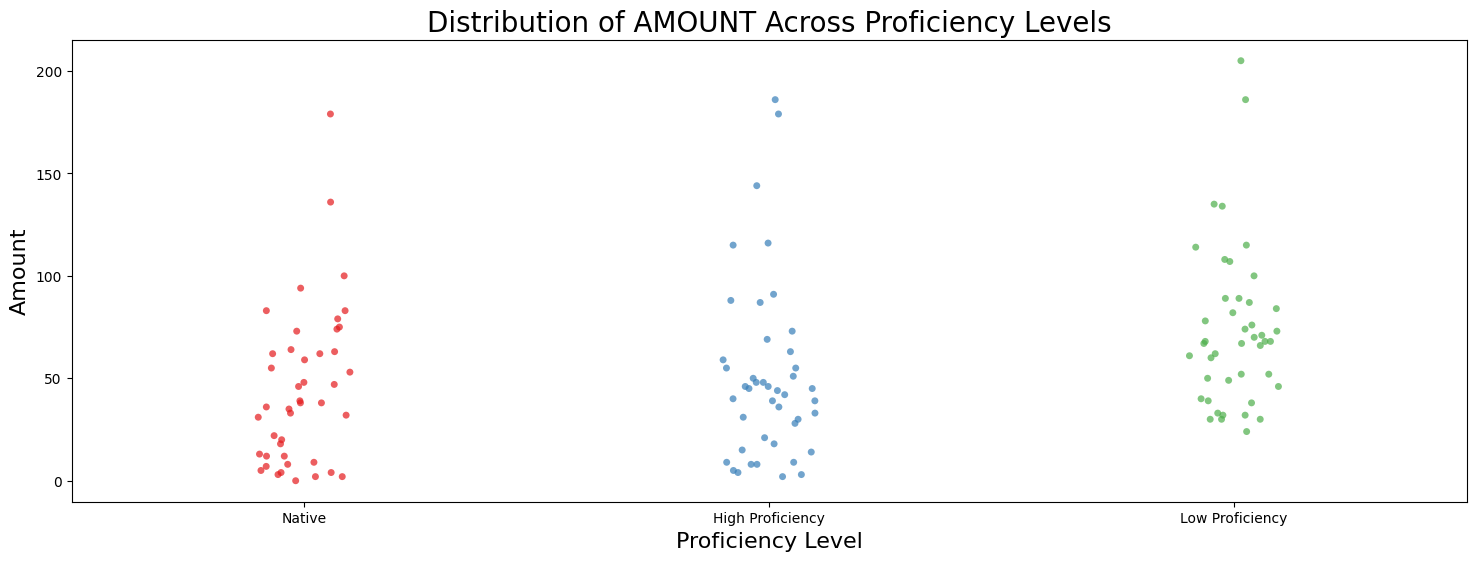

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig = plt.figure(figsize=(18, 6))

# Create a strip plot to visualize the distribution of AMOUNT across different PROFICIENCY levels
sns.stripplot(x='PROFICIENCY', y='AMOUNT', data=df, palette='Set1', jitter=True, alpha=0.7)

# Set the title and labels
plt.title('Distribution of AMOUNT Across Proficiency Levels', fontsize=20)
plt.xlabel('Proficiency Level', fontsize=16)
plt.ylabel('Amount', fontsize=16)

# Show the plot
plt.show()


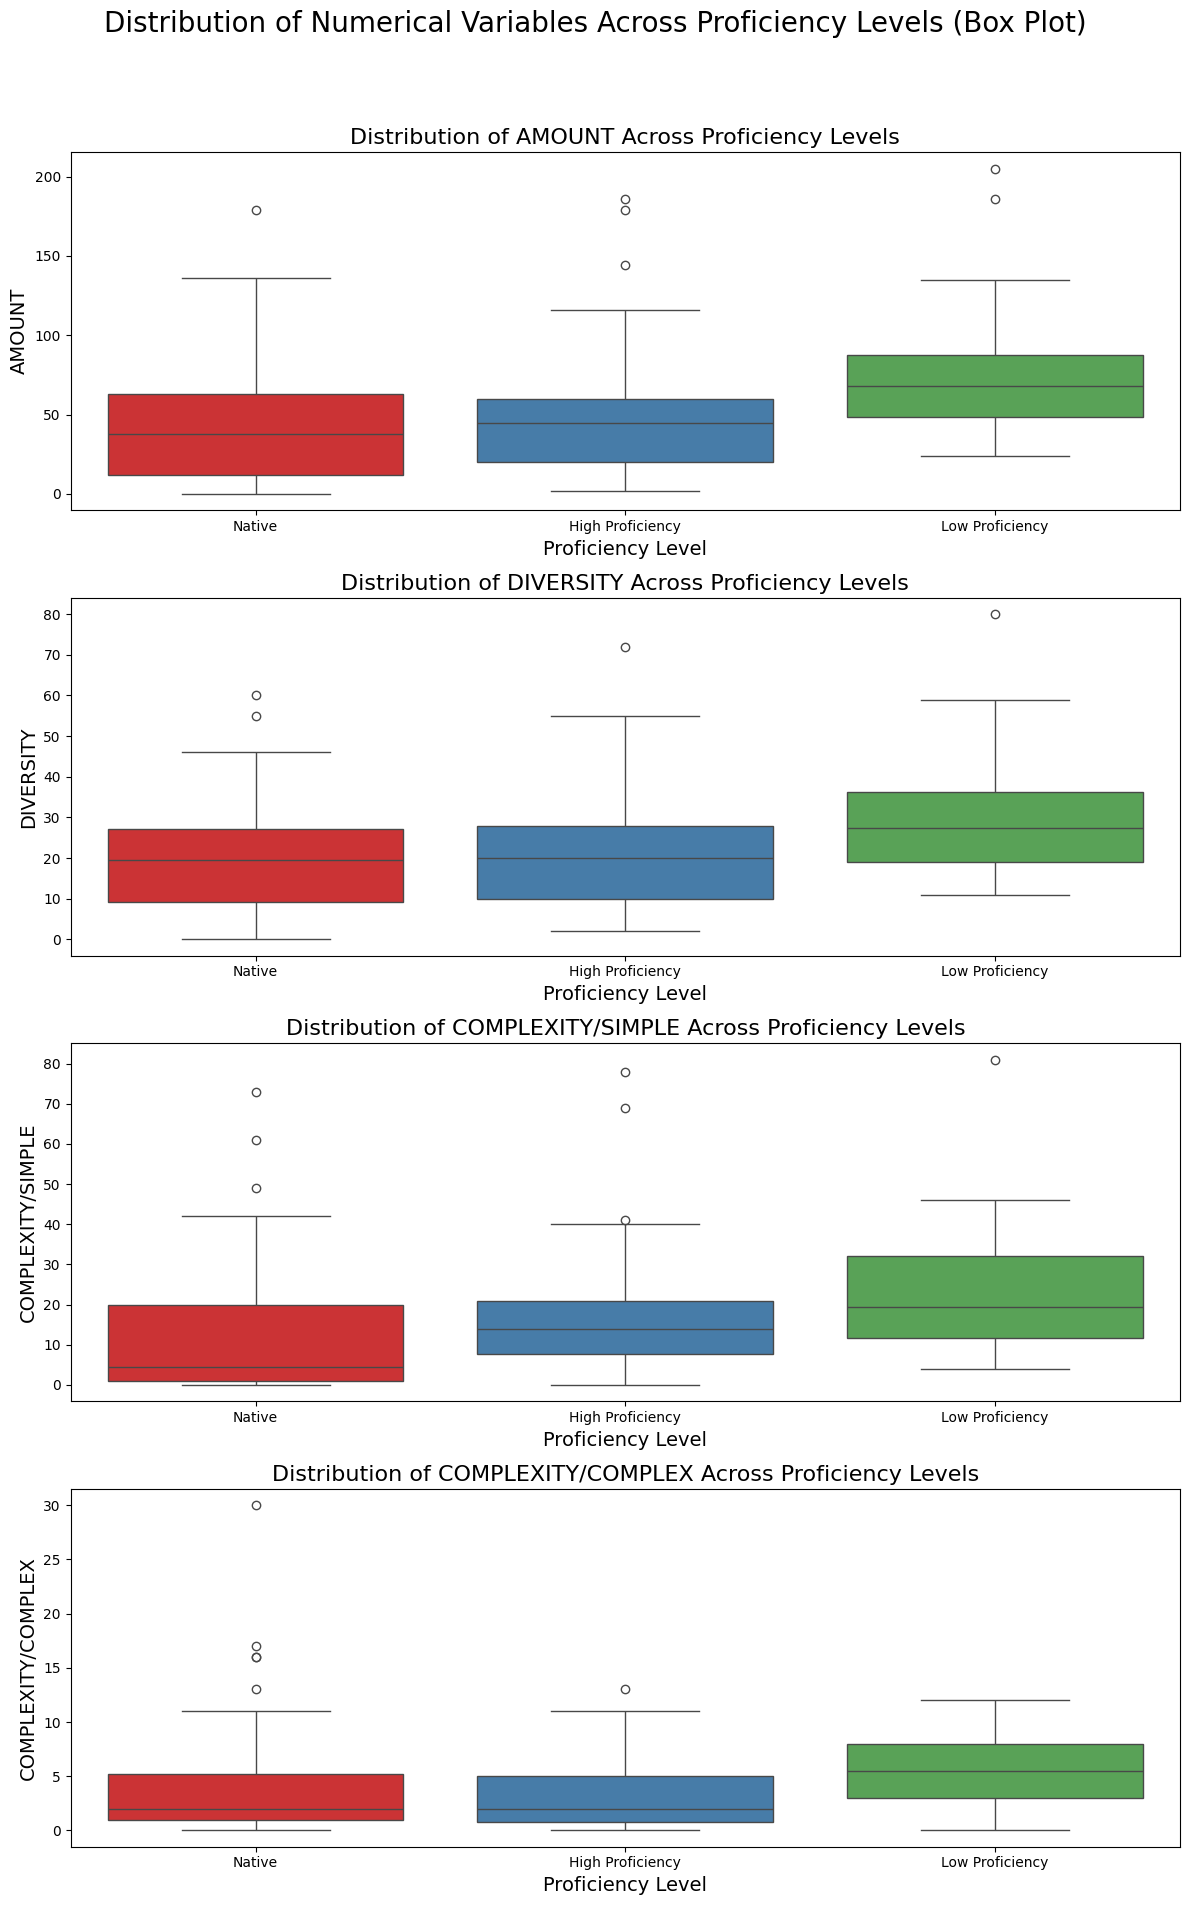

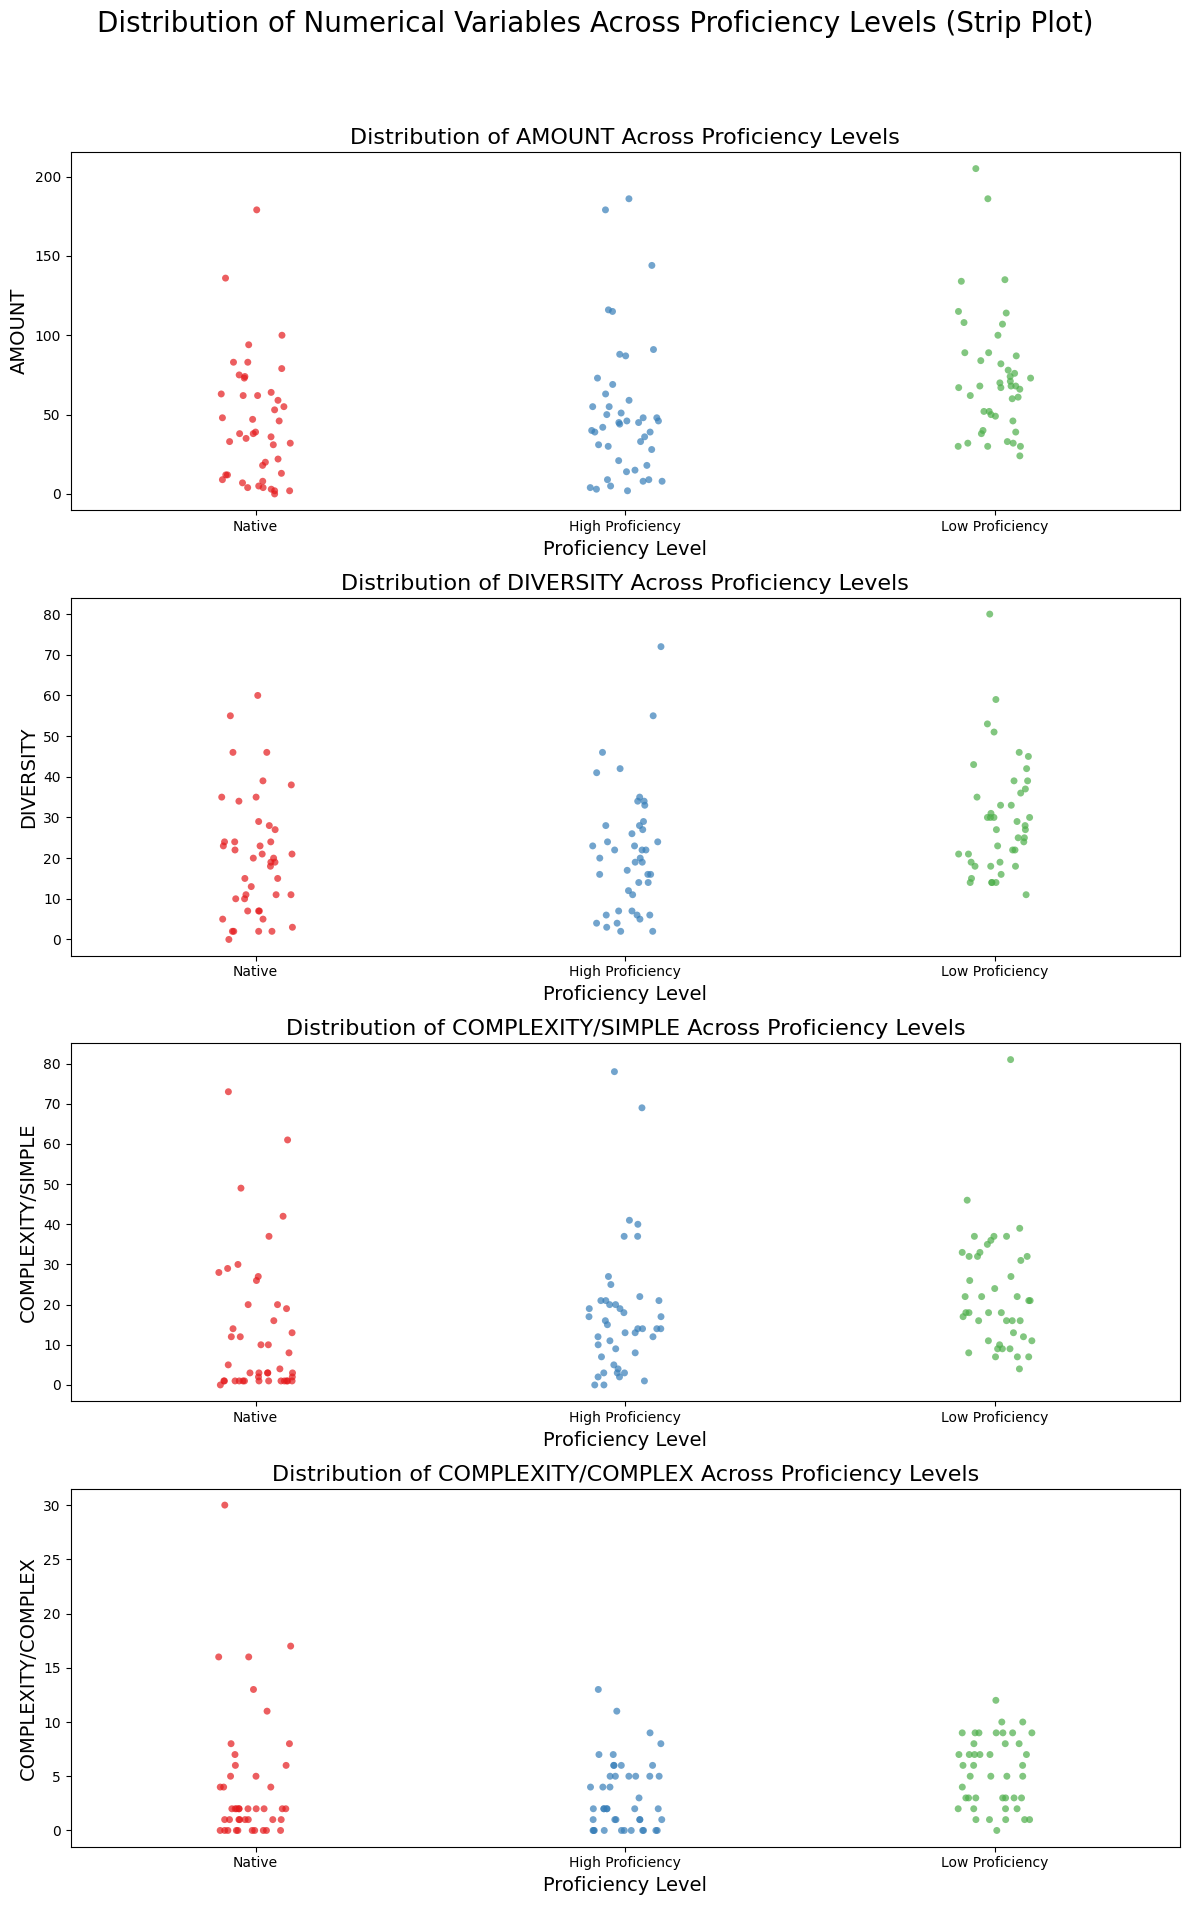

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables to plot
numerical_vars = ['AMOUNT', 'DIVERSITY', 'COMPLEXITY/SIMPLE', 'COMPLEXITY/COMPLEX']

# Set up the figure for box plots
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, 5 * len(numerical_vars)))
fig.suptitle('Distribution of Numerical Variables Across Proficiency Levels (Box Plot)', fontsize=20)

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='PROFICIENCY', y=var, data=df, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Distribution of {var} Across Proficiency Levels', fontsize=16)
    axes[i].set_xlabel('Proficiency Level', fontsize=14)
    axes[i].set_ylabel(var, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Set up the figure for strip plots
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, 5 * len(numerical_vars)))
fig.suptitle('Distribution of Numerical Variables Across Proficiency Levels (Strip Plot)', fontsize=20)

for i, var in enumerate(numerical_vars):
    sns.stripplot(x='PROFICIENCY', y=var, data=df, palette='Set1', jitter=True, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} Across Proficiency Levels', fontsize=16)
    axes[i].set_xlabel('Proficiency Level', fontsize=14)
    axes[i].set_ylabel(var, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


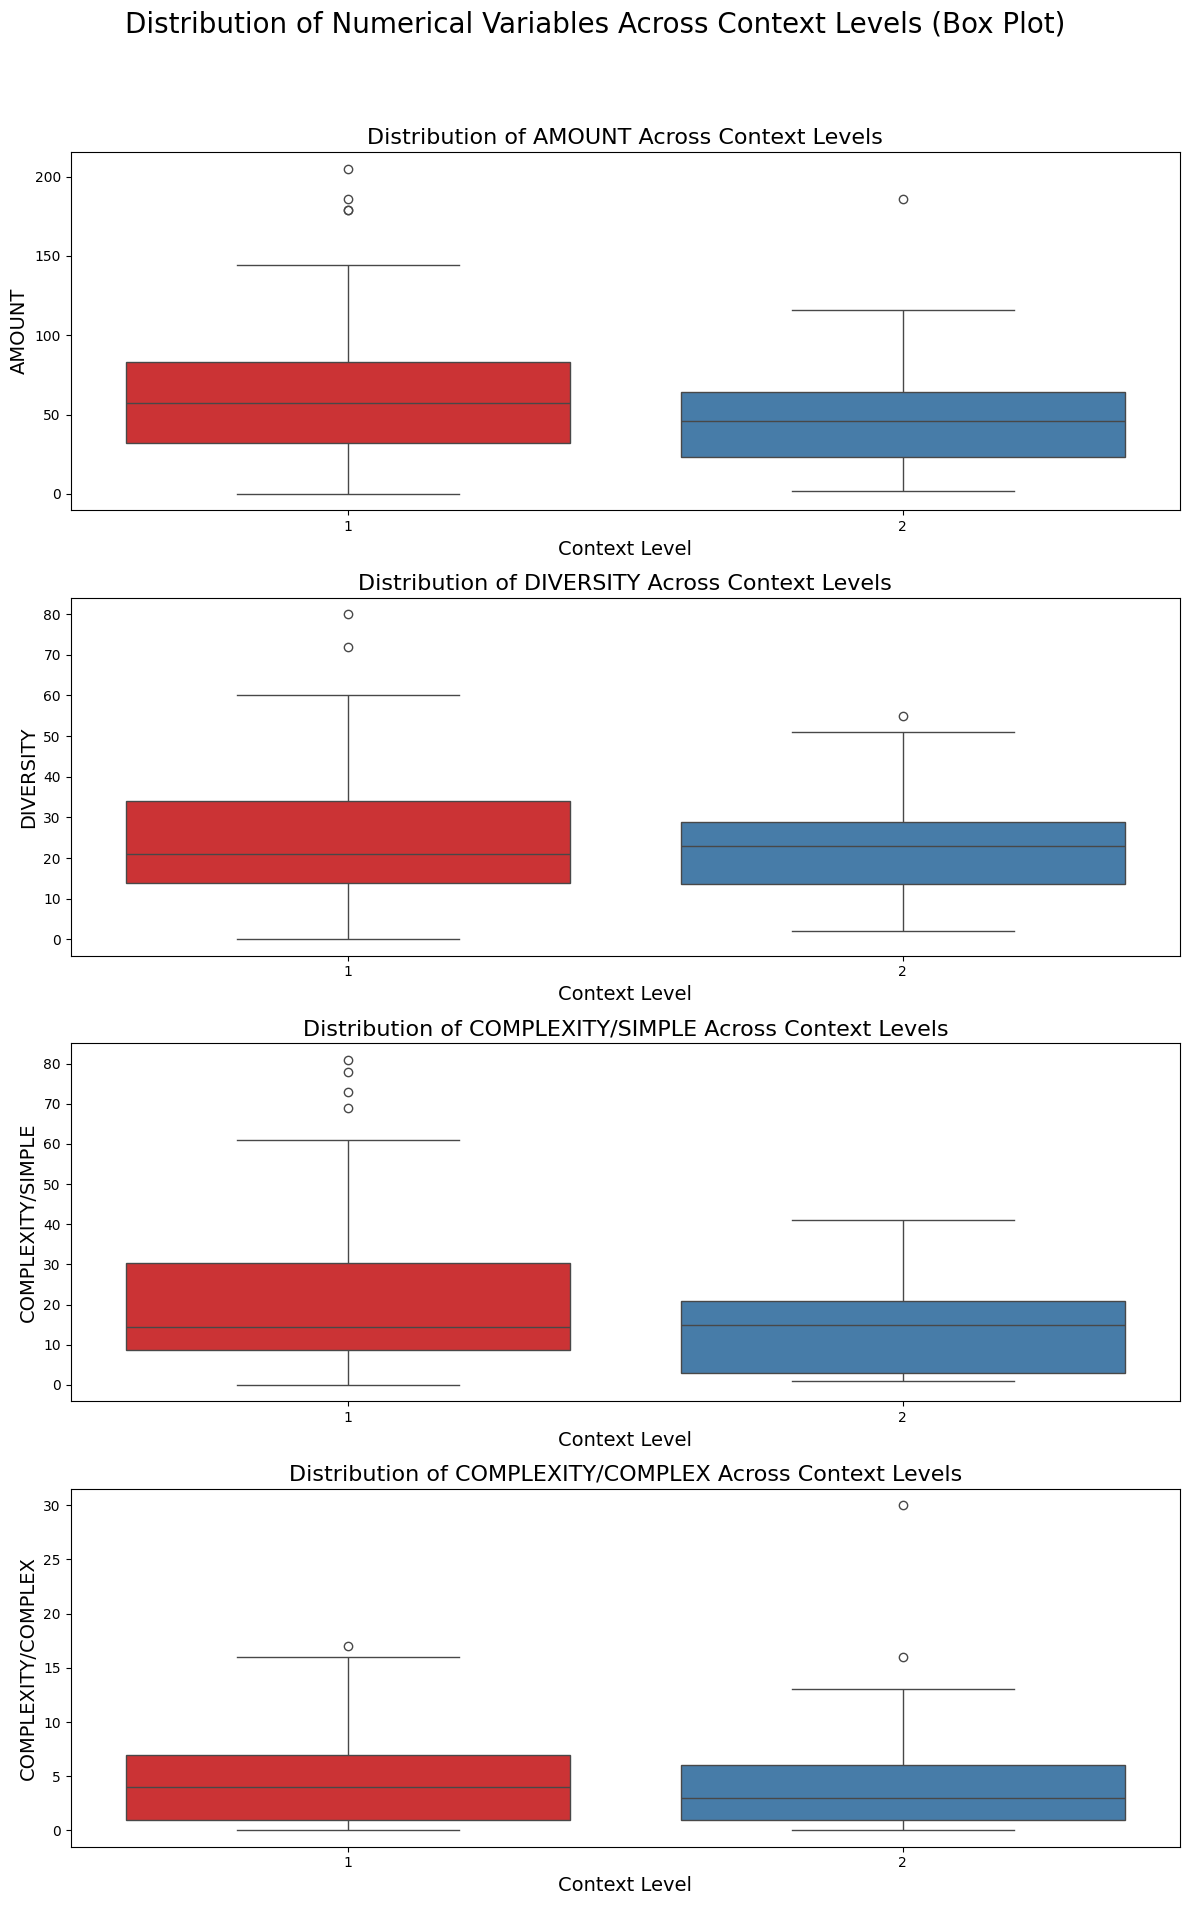

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables to plot
numerical_vars = ['AMOUNT', 'DIVERSITY', 'COMPLEXITY/SIMPLE', 'COMPLEXITY/COMPLEX']

# Set up the figure for box plots
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, 5 * len(numerical_vars)))
fig.suptitle('Distribution of Numerical Variables Across Context Levels (Box Plot)', fontsize=20)

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='CONTEXT', y=var, data=df, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Distribution of {var} Across Context Levels', fontsize=16)
    axes[i].set_xlabel('Context Level', fontsize=14)
    axes[i].set_ylabel(var, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


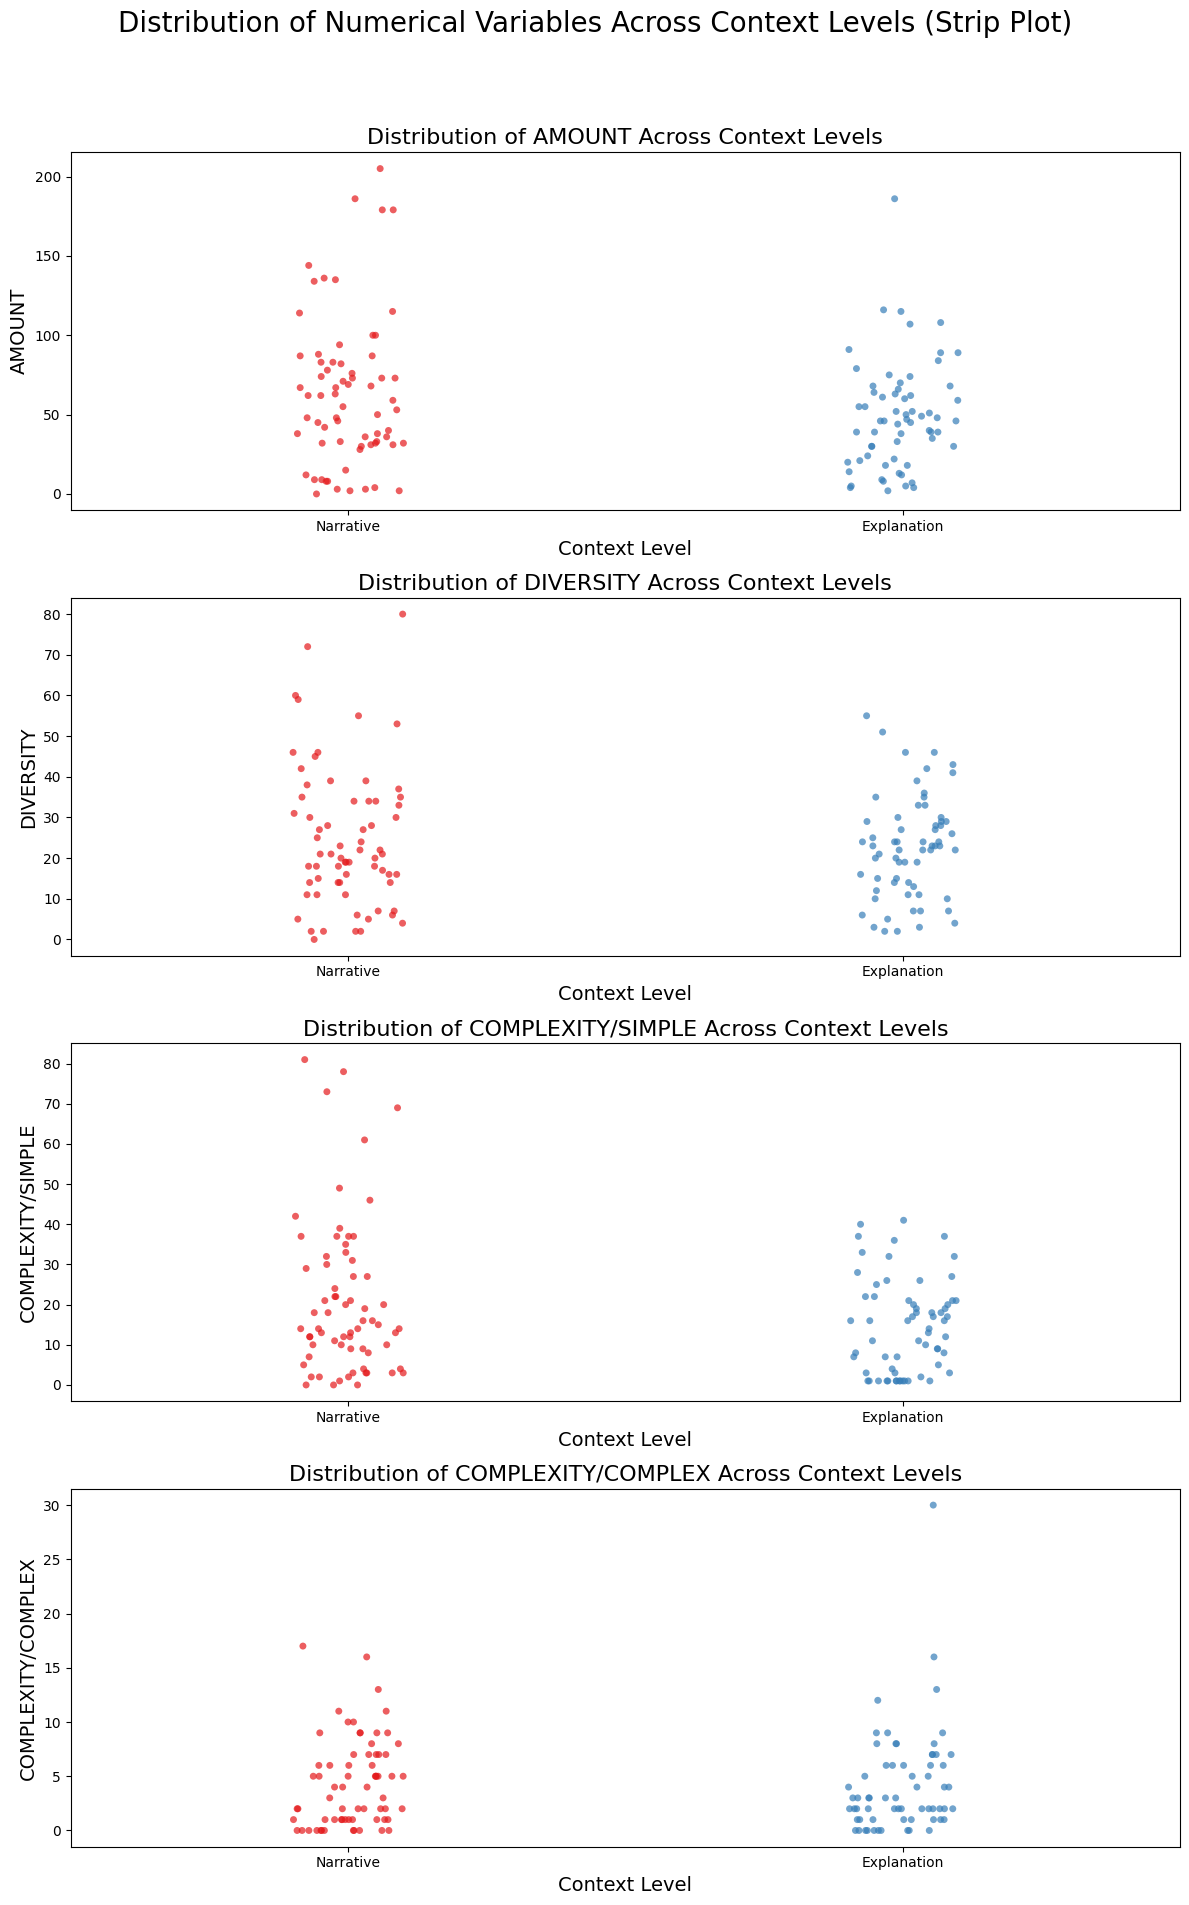

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert CONTEXT to categorical type with appropriate labels
df['CONTEXT'] = pd.Categorical(df['CONTEXT'], categories=[1, 2], ordered=True)
df['CONTEXT_LABEL'] = df['CONTEXT'].cat.rename_categories(['Narrative', 'Explanation'])

# List of numerical variables to plot
numerical_vars = ['AMOUNT', 'DIVERSITY', 'COMPLEXITY/SIMPLE', 'COMPLEXITY/COMPLEX']  # Update this list as needed

# Set up the figure for strip plots
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, 5 * len(numerical_vars)))
fig.suptitle('Distribution of Numerical Variables Across Context Levels (Strip Plot)', fontsize=20)

for i, var in enumerate(numerical_vars):
    sns.stripplot(x='CONTEXT_LABEL', y=var, data=df, palette='Set1', jitter=True, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} Across Context Levels', fontsize=16)
    axes[i].set_xlabel('Context Level', fontsize=14)
    axes[i].set_ylabel(var, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


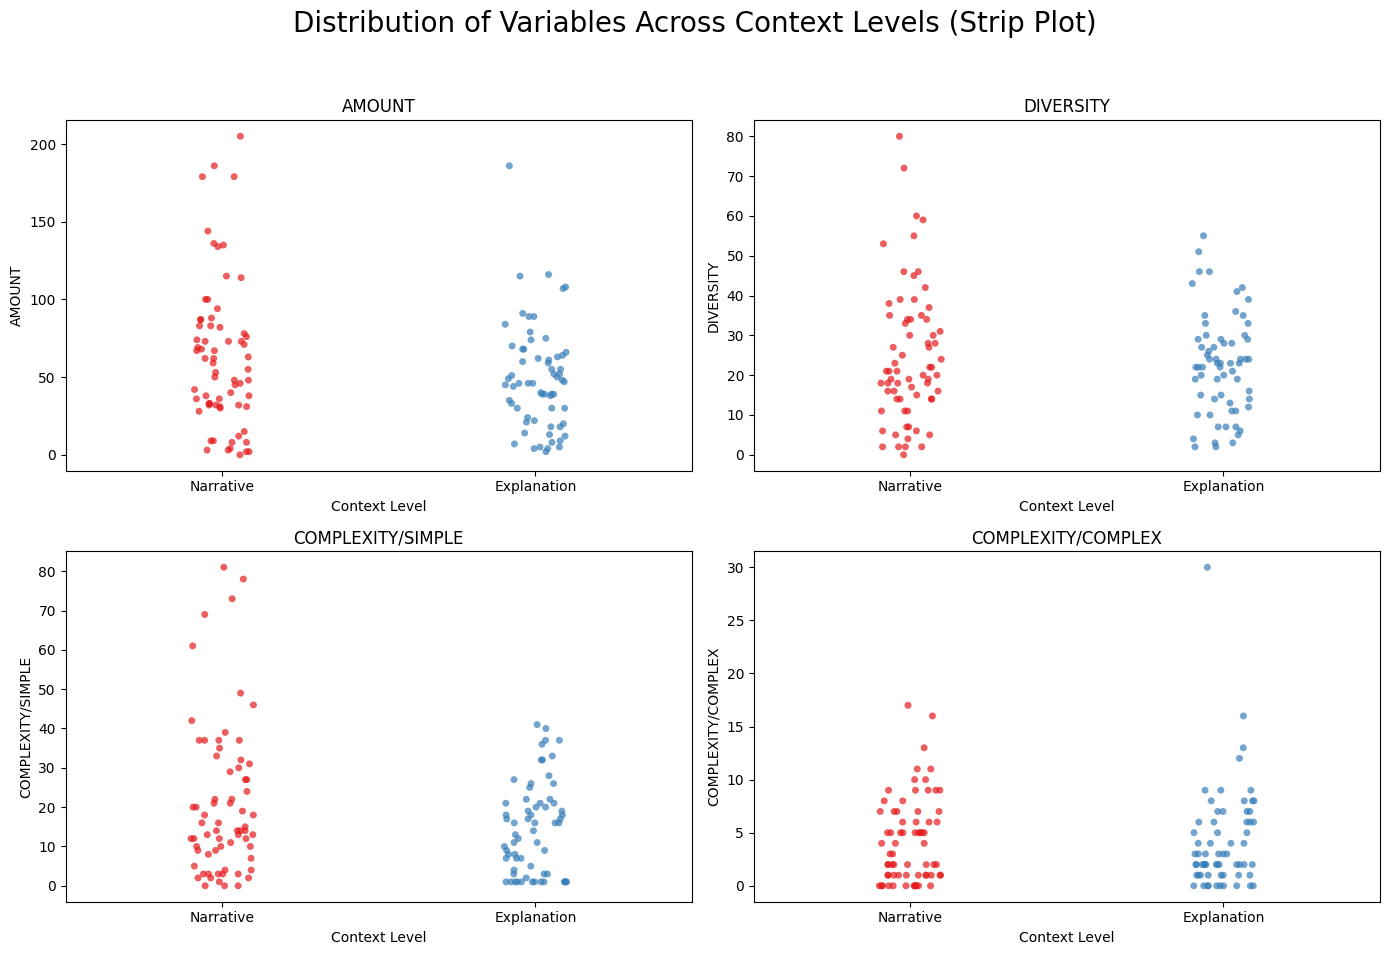

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map the numeric values to descriptive labels
context_mapping = {1: 'Narrative', 2: 'Explanation'}
df['CONTEXT'] = df['CONTEXT'].map(context_mapping)

# List of variables to plot
variables = [
    'AMOUNT',
    'DIVERSITY',
    'COMPLEXITY/SIMPLE',
    'COMPLEXITY/COMPLEX'
]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjusted to 2x2 grid
fig.suptitle('Distribution of Variables Across Context Levels (Strip Plot)', fontsize=20)

# Loop through each variable and create a strip plot
for i, var in enumerate(variables):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    sns.stripplot(x='CONTEXT', y=var, data=df, palette='Set1', jitter=True, alpha=0.7, ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('Context Level')
    axes[row, col].set_ylabel(var)

# Adjust layout to fit the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


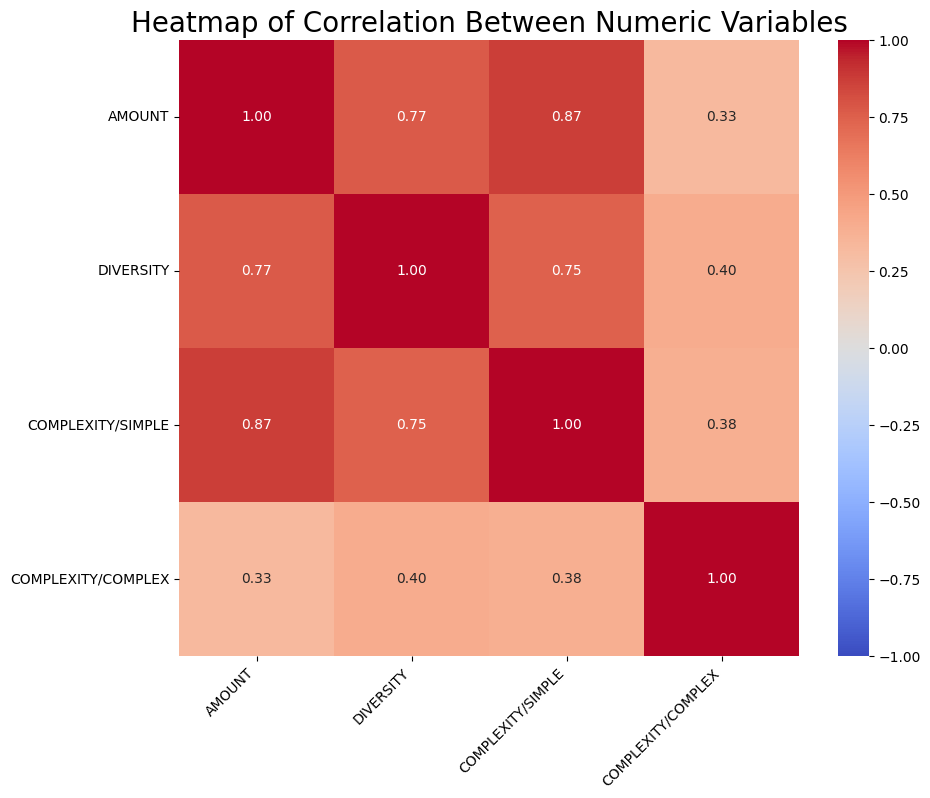

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric variables to include in the heatmap
variables = [
    'AMOUNT',
    'DIVERSITY',
    'COMPLEXITY/SIMPLE',
    'COMPLEXITY/COMPLEX'
]

# Subset the DataFrame to include only the relevant numeric variables
subset_df = df[variables]

# Calculate the correlation matrix
corr_matrix = subset_df.corr(numeric_only=True)

# Create the heatmap
fig = plt.figure(figsize=(10, 8))  # Adjusted figsize for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Heatmap of Correlation Between Numeric Variables', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


**HANDLE OUTLIERS**

The handled data is in DF2

In [15]:
import pandas as pd

# Define numerical columns to handle outliers
numerical_columns = [
    'AMOUNT',
    'DIVERSITY',
    'COMPLEXITY/SIMPLE',
    'COMPLEXITY/COMPLEX',
]

# Create a copy of the DataFrame to preserve the original
df2 = df.copy()

# Handle outliers by replacing with 5th and 95th percentiles
for column in numerical_columns:
    # Check if the column exists and has data
    if column in df2.columns and df2[column].dropna().size > 0:
        # Compute percentiles
        q_low = df2[column].quantile(0.05)
        q_hi  = df2[column].quantile(0.95)

        # Replace outliers
        df2[column] = df2[column].apply(lambda x: q_low if x < q_low else (q_hi if x > q_hi else x))

        # Print updated statistics
        print(f"Outliers in {column} after replacement:")
        print(df2[column].describe())
    else:
        print(f"Column {column} does not exist or is empty.")

# Optionally print a sample of the data
print(df2[numerical_columns].head())


Outliers in AMOUNT after replacement:
count    132.000000
mean      54.402652
std       36.085386
min        4.000000
25%       30.000000
50%       48.500000
75%       74.000000
max      135.450000
Name: AMOUNT, dtype: float64
Outliers in DIVERSITY after replacement:
count    132.000000
mean      23.220833
std       13.488318
min        2.550000
25%       14.000000
50%       22.000000
75%       31.500000
max       51.900000
Name: DIVERSITY, dtype: float64
Outliers in COMPLEXITY/SIMPLE after replacement:
count    132.000000
mean      16.815152
std       12.961826
min        1.000000
25%        5.000000
50%       14.500000
75%       25.250000
max       43.800000
Name: COMPLEXITY/SIMPLE, dtype: float64
Outliers in COMPLEXITY/COMPLEX after replacement:
count    132.000000
mean       4.031439
std        3.493054
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       11.450000
Name: COMPLEXITY/COMPLEX, dtype: float64
   AMOUNT  DIVERSITY  COMPLEXITY/SIMPLE 

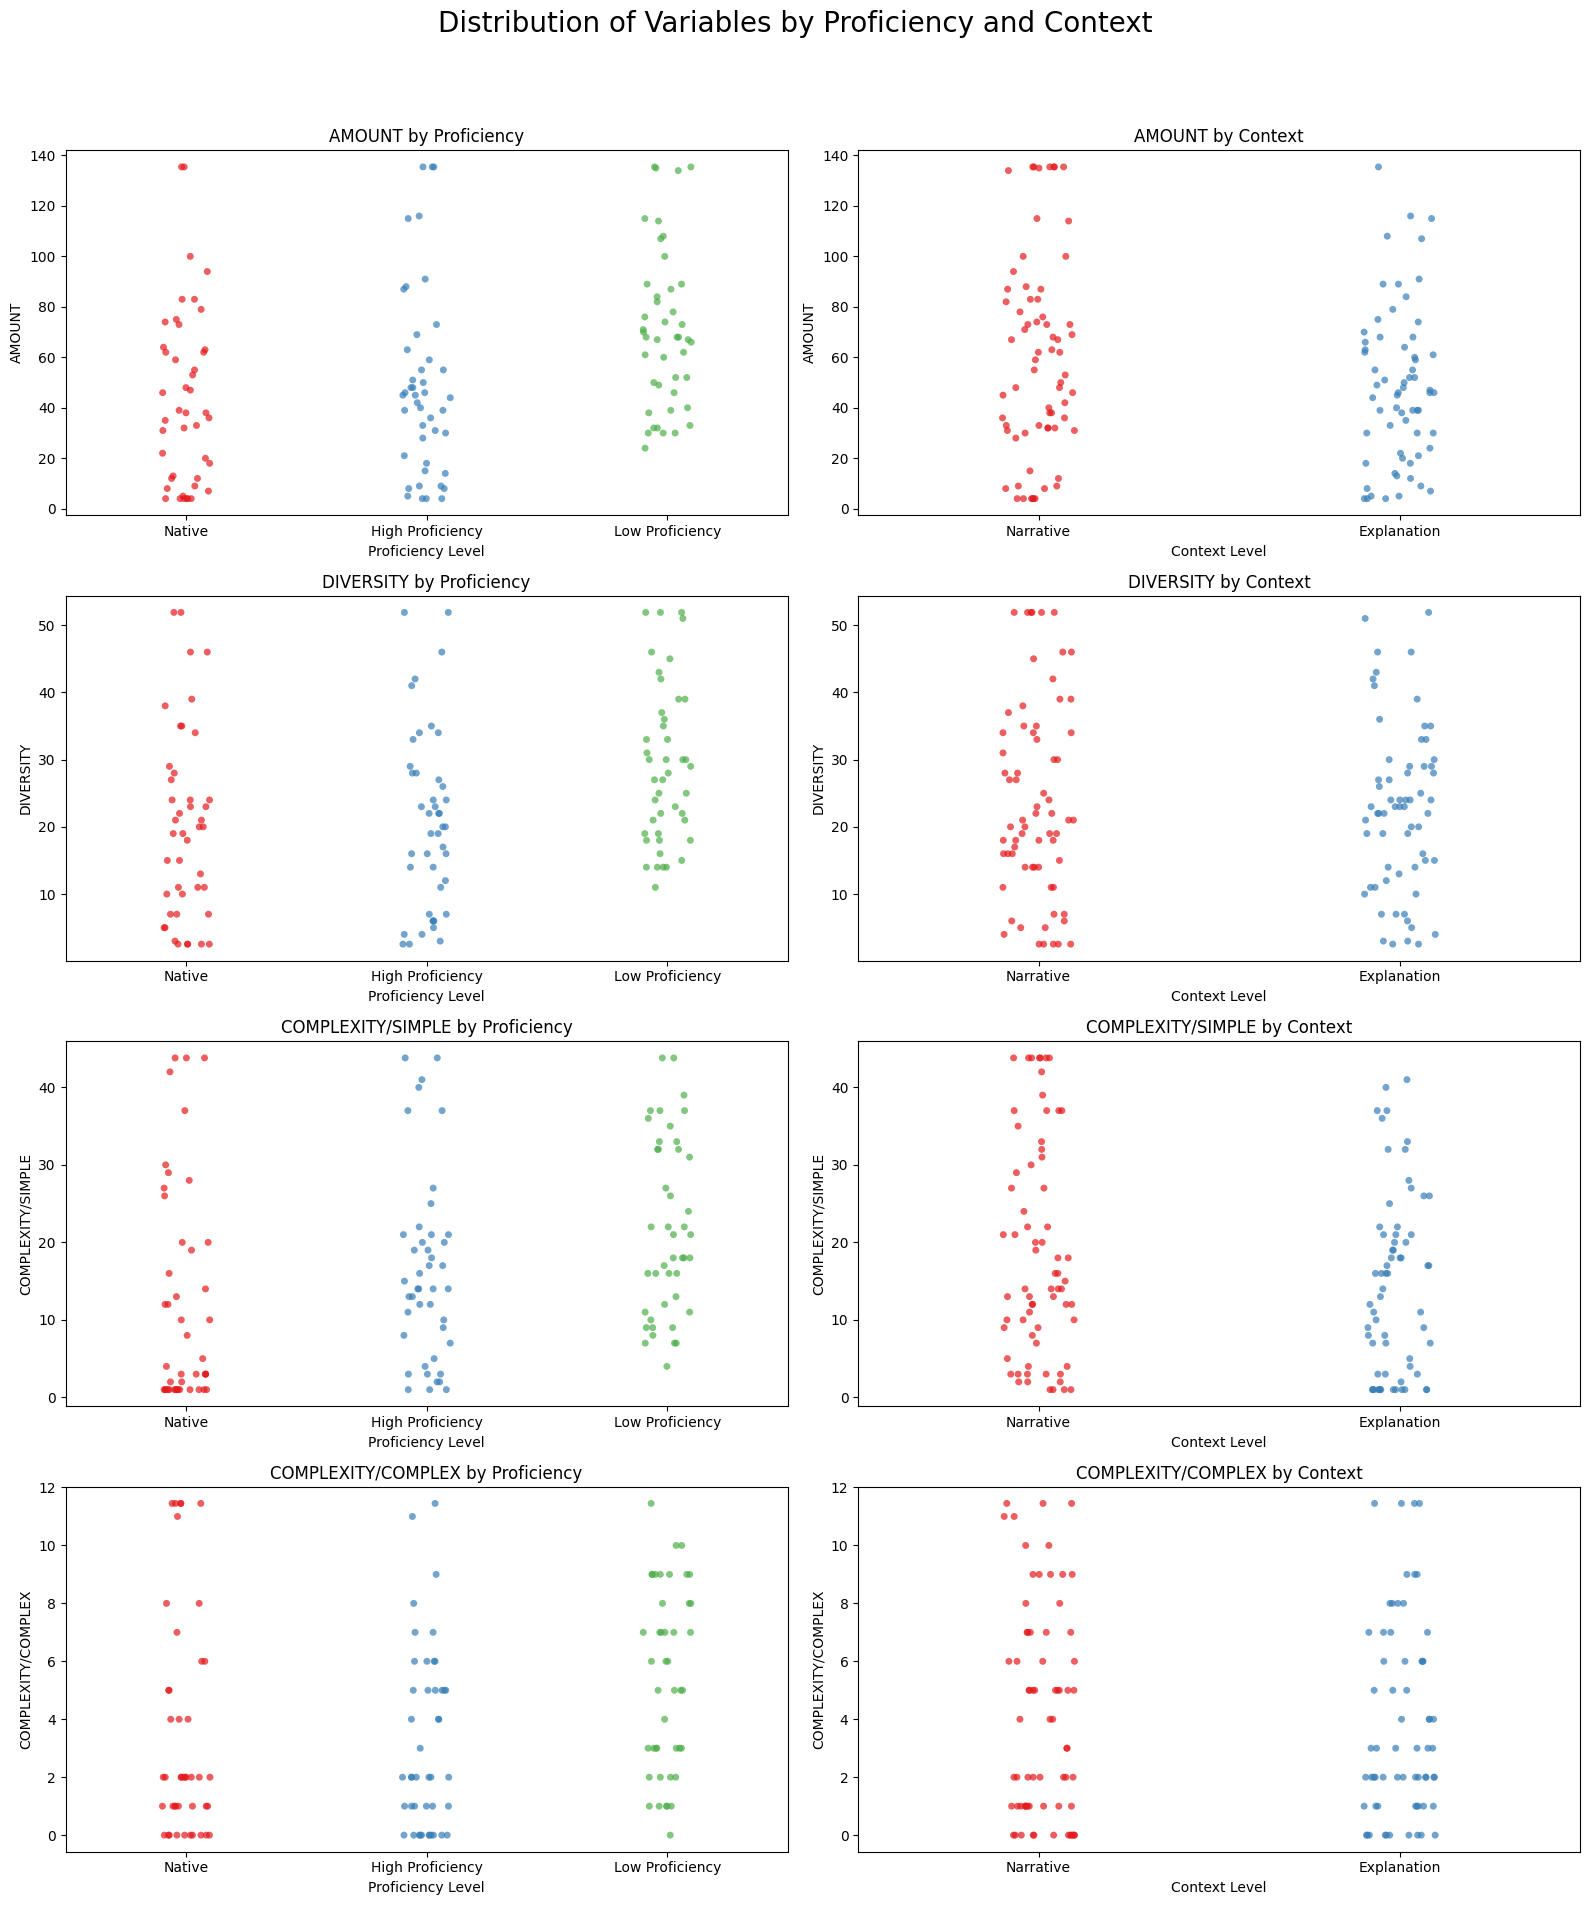

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric variables to plot
variables = [
    'AMOUNT',
    'DIVERSITY',
    'COMPLEXITY/SIMPLE',
    'COMPLEXITY/COMPLEX'
]

# Create a figure with subplots
fig, axes = plt.subplots(len(variables), 2, figsize=(16, len(variables) * 5))  # Adjusted for each variable and two contexts
fig.suptitle('Distribution of Variables by Proficiency and Context', fontsize=20)

# Loop through each variable and create strip plots for PROFFICIENCY and CONTEXT
for i, var in enumerate(variables):
    # Strip plot for PROFICIENCY
    sns.stripplot(x='PROFICIENCY', y=var, data=df2, palette='Set1', jitter=True, alpha=0.7, ax=axes[i, 0])
    axes[i, 0].set_title(f'{var} by Proficiency')
    axes[i, 0].set_xlabel('Proficiency Level')
    axes[i, 0].set_ylabel(var)

    # Strip plot for CONTEXT
    sns.stripplot(x='CONTEXT', y=var, data=df2, palette='Set1', jitter=True, alpha=0.7, ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} by Context')
    axes[i, 1].set_xlabel('Context Level')
    axes[i, 1].set_ylabel(var)

# Adjust layout to fit the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


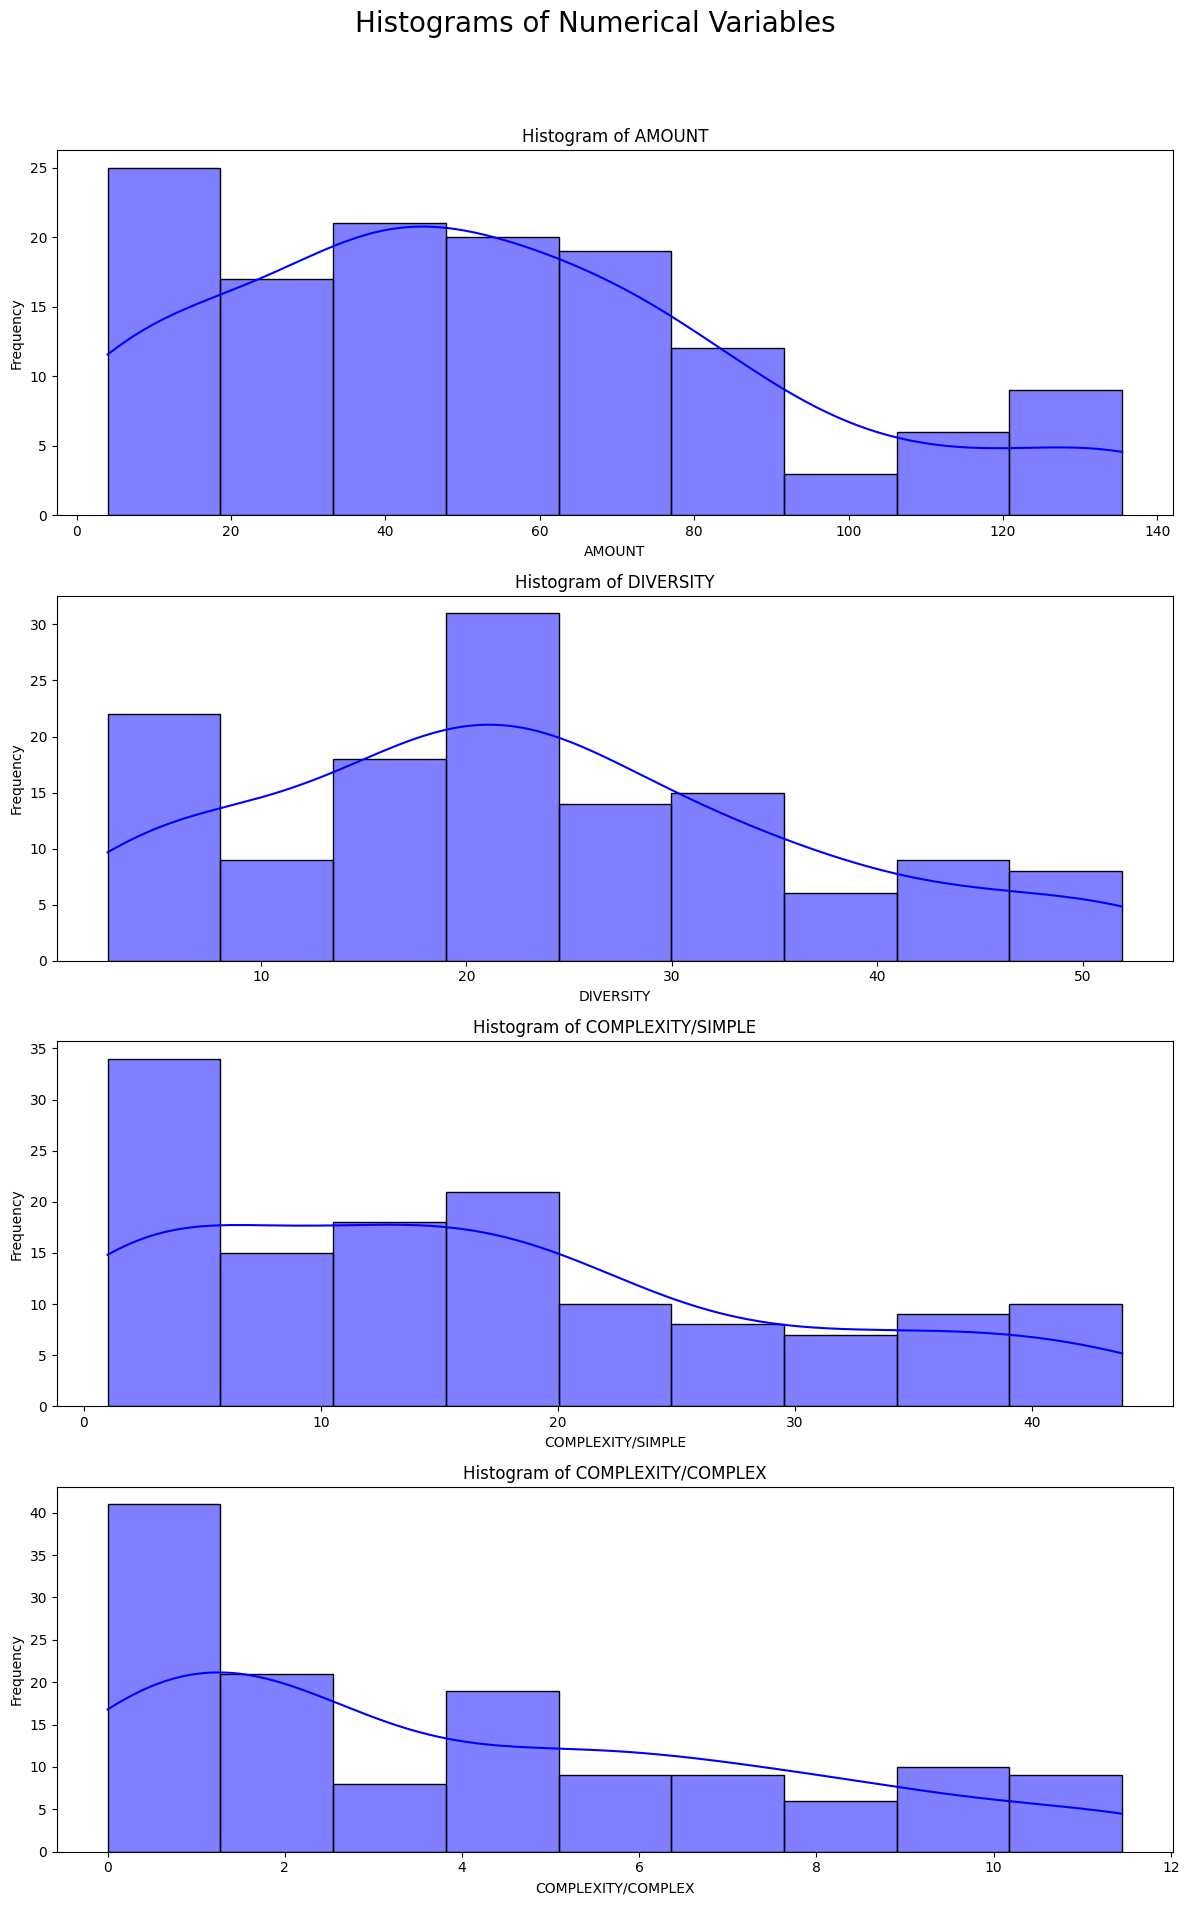

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric variables to plot
variables = [
    'AMOUNT',
    'DIVERSITY',
    'COMPLEXITY/SIMPLE',
    'COMPLEXITY/COMPLEX'
]

# Create a figure with subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(12, len(variables) * 5))  # Adjusted for each variable
fig.suptitle('Histograms of Numerical Variables', fontsize=20)

# Loop through each variable and create a histogram
for i, var in enumerate(variables):
    sns.histplot(df2[var], kde=True, ax=axes[i], color='blue')  # Added KDE for smoother distribution
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout to fit the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Looks better.

Standardized data is saved in DF3

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df2 is your original DataFrame

# Define the columns to be standardized
columns_to_standardize = ['AMOUNT', 'DIVERSITY', 'COMPLEXITY/SIMPLE', 'COMPLEXITY/COMPLEX']

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy of the original DataFrame to store the standardized data
df3 = df2.copy()

# Apply standardization to the specified columns
df3[columns_to_standardize] = scaler.fit_transform(df2[columns_to_standardize])

# Optionally, you can check the first few rows of the new DataFrame
print(df3.head())



       SID PROFICIENCY     SEX      CONTEXT    AMOUNT  DIVERSITY  \
0  MN_2447      Native  Female    Narrative -0.511918  -0.239697   
1  MN_2447      Native  Female  Explanation -1.012635  -0.760641   
2  MN_5998      Native  Female    Narrative -0.595371  -0.165276   
3  MN_5998      Native  Female  Explanation -1.179541  -0.983903   
4  MN_1326      Native  Female    Narrative  0.127887  -0.165276   

   COMPLEXITY/SIMPLE  COMPLEXITY/COMPLEX CONTEXT_LABEL  
0          -0.527789            0.278338     Narrative  
1          -1.069894           -1.158527   Explanation  
2          -0.063128            2.131894     Narrative  
3          -0.527789           -0.583781   Explanation  
4          -1.069894           -0.583781     Narrative  


**DF 3 is the Standardized**

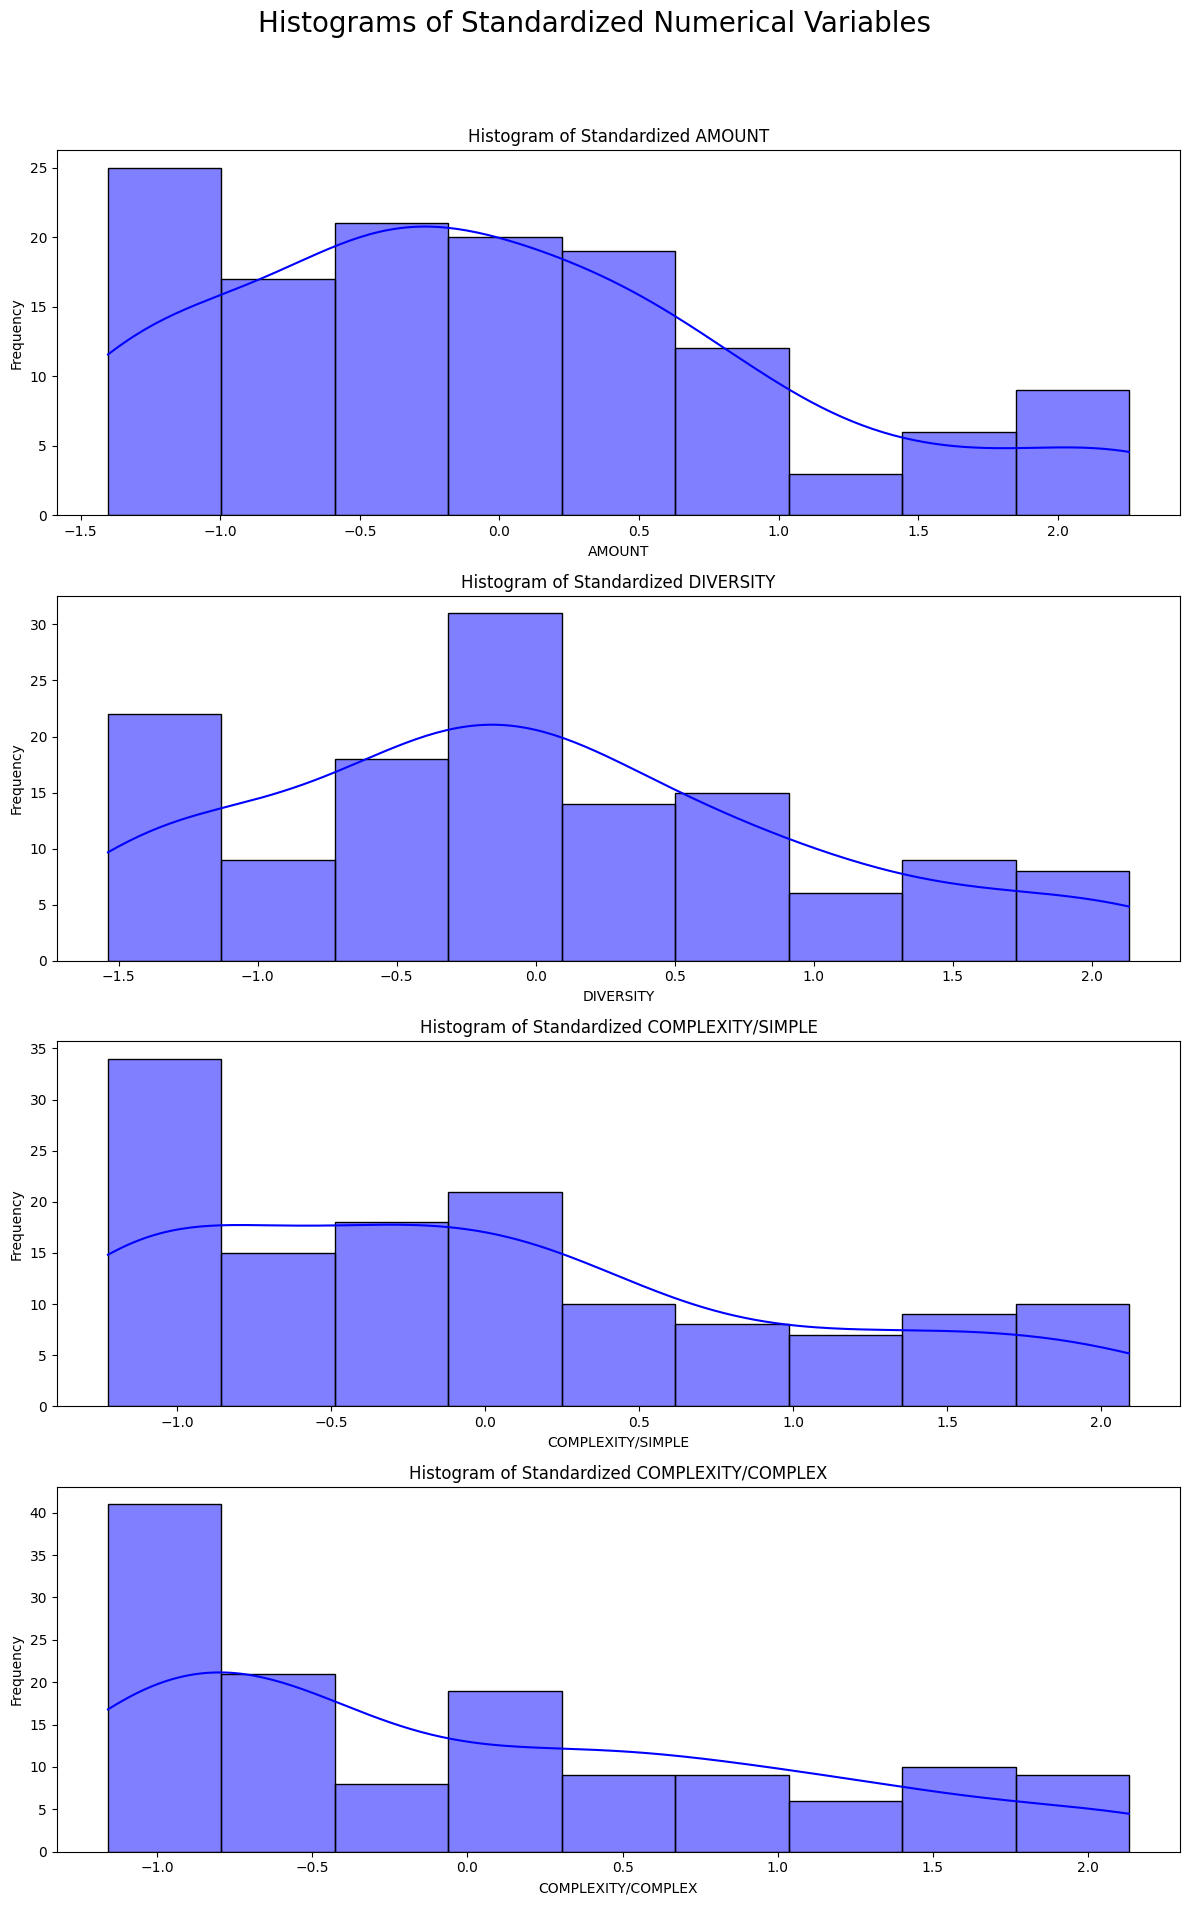

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric variables to plot
variables = [
    'AMOUNT',
    'DIVERSITY',
    'COMPLEXITY/SIMPLE',
    'COMPLEXITY/COMPLEX'
]

# Create a figure with subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(12, len(variables) * 5))  # Adjusted for each variable
fig.suptitle('Histograms of Standardized Numerical Variables', fontsize=20)

# Loop through each variable and create a histogram
for i, var in enumerate(variables):
    sns.histplot(df3[var], kde=True, ax=axes[i], color='blue')  # Added KDE for smoother distribution
    axes[i].set_title(f'Histogram of Standardized {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout to fit the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd

# Perform one-hot encoding with drop_first=True to exclude Native as the baseline
df3_encoded = pd.get_dummies(df3, columns=['PROFICIENCY'], drop_first=True)

# Rename columns to ensure correct names
df3_encoded.rename(columns={
    'PROFICIENCY_2': 'PROFICIENCY_High_Proficiency',
    'PROFICIENCY_3': 'PROFICIENCY_Low_Proficiency'
}, inplace=True)

# Optionally, remove any unexpected columns
df3_encoded.drop(columns=['PROFICIENCY_Native'], errors='ignore', inplace=True)

# Print the DataFrame and columns to verify
print(df3_encoded.head())
print(df3_encoded.columns)


       SID  SEX      CONTEXT    AMOUNT  DIVERSITY  COMPLEXITY/SIMPLE  \
0  MN_2447    1    Narrative -0.511918  -0.239697          -0.527789   
1  MN_2447    1  Explanation -1.012635  -0.760641          -1.069894   
2  MN_5998    1    Narrative -0.595371  -0.165276          -0.063128   
3  MN_5998    1  Explanation -1.179541  -0.983903          -0.527789   
4  MN_1326    1    Narrative  0.127887  -0.165276          -1.069894   

   COMPLEXITY/COMPLEX  PROFICIENCY_High_Proficiency  \
0            0.278338                         False   
1           -1.158527                         False   
2            2.131894                         False   
3           -0.583781                         False   
4           -0.583781                         False   

   PROFICIENCY_Low_Proficiency  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
Index(['SID', 'SEX', 'CONTEXT', 'AMOUN

In [ ]:
df3_encoded.columns

Index(['SID', 'SEX', 'CONTEXT', 'AMOUNT', 'DIVERSITY', 'COMPLEXITY/SIMPLE',
       'COMPLEXITY/COMPLEX', 'PROFICIENCY_High_Proficiency',
       'PROFICIENCY_Low_Proficiency'],
      dtype='object')

In [ ]:
#verifying variables:
df3_encoded.columns

Index(['SID', 'SEX', 'CONTEXT', 'AMOUNT', 'DIVERSITY', 'COMPLEXITY/SIMPLE',
       'COMPLEXITY/COMPLEX', 'PROFICIENCY_High_Proficiency',
       'PROFICIENCY_Low_Proficiency'],
      dtype='object')

Perfect: we did one-hot enchoding! for proficiency.
one-hot enchoding helps ML models to predict variables better.

It shows my outliers replacement worked properly.

In [ ]:
df3_encoded.head()


,SID,SEX,CONTEXT,AMOUNT,DIVERSITY,COMPLEXITY/SIMPLE,COMPLEXITY/COMPLEX,PROFICIENCY_High_Proficiency,PROFICIENCY_Low_Proficiency
0,MN_2447,1,Narrative,-0.511918,-0.239697,-0.527789,0.278338,False,False
1,MN_2447,1,Explanation,-1.012635,-0.760641,-1.069894,-1.158527,False,False
2,MN_5998,1,Narrative,-0.595371,-0.165276,-0.063128,2.131894,False,False
3,MN_5998,1,Explanation,-1.179541,-0.983903,-0.527789,-0.583781,False,False
4,MN_1326,1,Narrative,0.127887,-0.165276,-1.069894,-0.583781,False,False


In [ ]:
df3_encoded.columns

Index(['SID', 'SEX', 'CONTEXT', 'AMOUNT', 'DIVERSITY', 'COMPLEXITY/SIMPLE',
       'COMPLEXITY/COMPLEX', 'PROFICIENCY_High_Proficiency',
       'PROFICIENCY_Low_Proficiency'],
      dtype='object')

In [ ]:
#replacing the space
# Rename columns with spaces
df3_encoded.columns = df3_encoded.columns.str.replace(' ', '_')


In [ ]:
import pandas as pd

# Rename columns to replace special characters and spaces
df3_encoded.columns = df3_encoded.columns.str.replace(' ', '_').str.replace('/', '_')


In [ ]:
print(df3_encoded.columns)


Index(['SID', 'SEX', 'CONTEXT', 'AMOUNT', 'DIVERSITY', 'COMPLEXITY_SIMPLE',
       'COMPLEXITY_COMPLEX', 'PROFICIENCY_High_Proficiency',
       'PROFICIENCY_Low_Proficiency'],
      dtype='object')


**Running GLMM**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# List of dependent variables
dependent_vars = ['AMOUNT', 'DIVERSITY', 'COMPLEXITY_SIMPLE', 'COMPLEXITY_COMPLEX']

# Loop through each dependent variable
for dv in dependent_vars:
    # Create the formula for GLMM with interaction terms
    formula = f'{dv} ~ PROFICIENCY_High_Proficiency + PROFICIENCY_Low_Proficiency + CONTEXT + PROFICIENCY_High_Proficiency:CONTEXT + PROFICIENCY_Low_Proficiency:CONTEXT'

    # Fit the GLMM model with random effect for SID
    model = smf.mixedlm(formula, df3_encoded, groups=df3_encoded["SID"]).fit()

    # Print the summary of the regression results
    print(f'Regression results for {dv}:')
    print(model.summary())
    print("\n" + "="*80 + "\n")


Regression results for AMOUNT:
                               Mixed Linear Model Regression Results
Model:                           MixedLM                Dependent Variable:                AMOUNT   
No. Observations:                132                    Method:                            REML     
No. Groups:                      67                     Scale:                             0.3932   
Min. group size:                 1                      Log-Likelihood:                    -169.1341
Max. group size:                 2                      Converged:                         Yes      
Mean group size:                 2.0                                                                
----------------------------------------------------------------------------------------------------
                                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------

In [ ]:
#Adding sex
import statsmodels.api as sm
import statsmodels.formula.api as smf

# List of dependent variables
dependent_vars = ['AMOUNT', 'DIVERSITY', 'COMPLEXITY_SIMPLE', 'COMPLEXITY_COMPLEX']

# Loop through each dependent variable
for dv in dependent_vars:
    # Create the formula for GLMM with interaction terms and SEX included
    formula = f'{dv} ~ PROFICIENCY_High_Proficiency + PROFICIENCY_Low_Proficiency + CONTEXT + SEX + PROFICIENCY_High_Proficiency:CONTEXT + PROFICIENCY_Low_Proficiency:CONTEXT + PROFICIENCY_High_Proficiency:SEX + PROFICIENCY_Low_Proficiency:SEX + CONTEXT:SEX'

    # Fit the GLMM model with random effect for SID
    model = smf.mixedlm(formula, df3_encoded, groups=df3_encoded["SID"]).fit()

    # Print the summary of the regression results
    print(f'Regression results for {dv}:')
    print(model.summary())
    print("\n" + "="*80 + "\n")


Regression results for AMOUNT:
                               Mixed Linear Model Regression Results
Model:                           MixedLM                Dependent Variable:                AMOUNT   
No. Observations:                132                    Method:                            REML     
No. Groups:                      67                     Scale:                             0.3982   
Min. group size:                 1                      Log-Likelihood:                    -168.8286
Max. group size:                 2                      Converged:                         Yes      
Mean group size:                 2.0                                                                
----------------------------------------------------------------------------------------------------
                                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------

In [ ]:
formula = f'{dv} ~ PROFICIENCY_Low_Proficiency + PROFICIENCY_High_Proficiency + CONTEXT + PROFICIENCY_Low_Proficiency:CONTEXT + PROFICIENCY_High_Proficiency:CONTEXT'


CHANGING THE BASELINE

In [18]:
import pandas as pd

# Perform one-hot encoding on the 'PROFICIENCY' column without drop_first
df5 = pd.get_dummies(df3, columns=['PROFICIENCY'])

# Drop the 'PROFICIENCY_High Proficiency' column to set it as the baseline
df5.drop(columns=['PROFICIENCY_High Proficiency'], inplace=True)

# Rename the remaining columns for clarity
df5.rename(columns={
    'PROFICIENCY_Native': 'PROFICIENCY_Native',
    'PROFICIENCY_Low Proficiency': 'PROFICIENCY_Low'
}, inplace=True)

# Print the DataFrame and columns to verify
print(df5.head())
print(df5.columns)

       SID     SEX      CONTEXT    AMOUNT  DIVERSITY  COMPLEXITY/SIMPLE  \
0  MN_2447  Female    Narrative -0.511918  -0.239697          -0.527789   
1  MN_2447  Female  Explanation -1.012635  -0.760641          -1.069894   
2  MN_5998  Female    Narrative -0.595371  -0.165276          -0.063128   
3  MN_5998  Female  Explanation -1.179541  -0.983903          -0.527789   
4  MN_1326  Female    Narrative  0.127887  -0.165276          -1.069894   

   COMPLEXITY/COMPLEX CONTEXT_LABEL  PROFICIENCY_Low  PROFICIENCY_Native  
0            0.278338     Narrative            False                True  
1           -1.158527   Explanation            False                True  
2            2.131894     Narrative            False                True  
3           -0.583781   Explanation            False                True  
4           -0.583781     Narrative            False                True  
Index(['SID', 'SEX', 'CONTEXT', 'AMOUNT', 'DIVERSITY', 'COMPLEXITY/SIMPLE',
       'COMPLEXITY/COMP

In [22]:
df5.rename(columns={'COMPLEXITY/SIMPLE': 'COMPLEXITY_SIMPLE', 'COMPLEXITY/COMPLEX': 'COMPLEXITY_COMPLEX'}, inplace=True)


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# List of dependent variables
dependent_vars = ['AMOUNT', 'DIVERSITY', 'COMPLEXITY_SIMPLE', 'COMPLEXITY_COMPLEX']

# Loop through each dependent variable
for dv in dependent_vars:
    # Create the formula for GLMM with interaction terms and SEX included
    formula = f'{dv} ~ PROFICIENCY_Native + PROFICIENCY_Low + CONTEXT_LABEL + SEX + PROFICIENCY_Native:CONTEXT_LABEL + PROFICIENCY_Low:CONTEXT_LABEL + PROFICIENCY_Native:SEX + PROFICIENCY_Low:SEX + CONTEXT_LABEL:SEX'

    # Fit the GLMM model with a random effect for SID
    model = smf.mixedlm(formula, df5, groups=df5["SID"]).fit()

    # Print the summary of the regression results
    print(f'Regression results for {dv}:')
    print(model.summary())
    print("\n" + "="*80 + "\n")


Regression results for AMOUNT:
                              Mixed Linear Model Regression Results
Model:                           MixedLM               Dependent Variable:               AMOUNT   
No. Observations:                132                   Method:                           REML     
No. Groups:                      67                    Scale:                            0.3982   
Min. group size:                 1                     Log-Likelihood:                   -168.8286
Max. group size:                 2                     Converged:                        Yes      
Mean group size:                 2.0                                                              
--------------------------------------------------------------------------------------------------
                                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------------
Intercept 